In [503]:
import os

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://localhost:9000"
os.environ["AWS_ACCESS_KEY_ID"] = "torontodeveloper"
os.environ["AWS_SECRET_ACCESS_KEY"] = "torontodeveloper"
import mlflow
mlflow.set_tracking_uri("http://localhost:5000") 

In [504]:
! pip install protobuf==3.20.*
! pip install mlflow

In [505]:
import mlflow
import os
# Optional: use named experiment
mlflow.set_experiment("DeepLearningLab1")

<Experiment: artifact_location='s3://bucket/1', creation_time=1751761574055, experiment_id='1', last_update_time=1751761574055, lifecycle_stage='active', name='DeepLearningLab1', tags={}>

In [506]:
! pip install mlflow psycopg2 boto3

In [507]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
import mlflow
import mlflow.keras
! pip install protobuf==3.20.*

In [508]:
# Check if experiment exists, if not, create it
if not mlflow.get_experiment_by_name("DeepLearningLab1"):
    mlflow.create_experiment(name="DeepLearningLab1", artifact_location="s3://deeplearninglab/")


In [509]:
mlflow.set_experiment("DeepLearningLab1")

<Experiment: artifact_location='s3://bucket/1', creation_time=1751761574055, experiment_id='1', last_update_time=1751761574055, lifecycle_stage='active', name='DeepLearningLab1', tags={}>

In [510]:
digits = load_digits()

In [511]:
digits.images.shape

(1797, 8, 8)

In [512]:
digits.data.shape

(1797, 64)

In [513]:
digits.target.shape

(1797,)

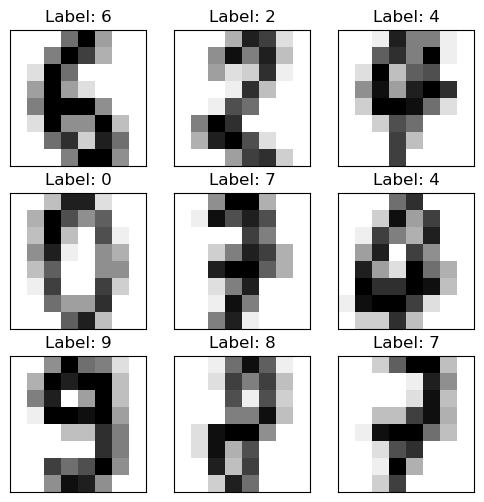

In [514]:
 # Selecting 9 random indices
random_indices = np.random.choice(len(digits.images), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {digits.target[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [515]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=42,test_size=0.2)

In [516]:
print(f'X_train {X_train.shape}')
print(f'y_train {y_train.shape}')
print(f'X_test {X_test.shape}')
print(f'y_test {y_test.shape}')

X_train (1437, 64)
y_train (1437,)
X_test (360, 64)
y_test (360,)


In [517]:
print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: 6
After one-hot encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [518]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(64,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 64)                4160      
                                                                 
 dense_186 (Dense)           (None, 64)                4160      
                                                                 
 dense_187 (Dense)           (None, 10)                650       
                                                                 
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [519]:
default_learning_rate = 0.01
model.compile(optimizer=SGD(default_learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])

In [520]:
X_train.shape

(1437, 64)

In [521]:
y_train.shape

(1437, 10)

In [522]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 4s 75ms/step - loss: 1.5342 - accuracy: 0.6057 - val_loss: 0.6057 - val_accuracy: 0.7986
Epoch 2/10
36/36 [==============================] - 0s 8ms/step - loss: 0.4694 - accuracy: 0.8625 - val_loss: 0.4420 - val_accuracy: 0.8611
Epoch 3/10
36/36 [==============================] - 0s 7ms/step - loss: 0.2863 - accuracy: 0.9138 - val_loss: 0.3422 - val_accuracy: 0.8924
Epoch 4/10
36/36 [==============================] - 0s 5ms/step - loss: 0.2143 - accuracy: 0.9408 - val_loss: 0.2904 - val_accuracy: 0.9132
Epoch 5/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1670 - accuracy: 0.9608 - val_loss: 0.2705 - val_accuracy: 0.9236
Epoch 6/10
36/36 [==============================] - 0s 6ms/step - loss: 0.1438 - accuracy: 0.9661 - val_loss: 0.2503 - val_accuracy: 0.9306
Epoch 7/10
36/36 [==============================] - 0s 10ms/step - loss: 0.1198 - accuracy: 0.9704 - val_loss: 0.2315 - val_accuracy: 0.9340
Epoch 8/10
36/36 [

In [523]:
model.history.history

{'loss': [1.5341801643371582,
  0.4694369435310364,
  0.28628382086753845,
  0.21429315209388733,
  0.16704288125038147,
  0.1437760293483734,
  0.11982900649309158,
  0.10878972709178925,
  0.09066229313611984,
  0.08244538307189941],
 'accuracy': [0.6057441234588623,
  0.8624891042709351,
  0.9138381481170654,
  0.9408181309700012,
  0.9608355164527893,
  0.9660574197769165,
  0.9704090356826782,
  0.9765012860298157,
  0.9817232489585876,
  0.9817232489585876],
 'val_loss': [0.6056793332099915,
  0.44200101494789124,
  0.3421698808670044,
  0.2904016077518463,
  0.2705385386943817,
  0.25026223063468933,
  0.23145969212055206,
  0.21504710614681244,
  0.20769312977790833,
  0.19614455103874207],
 'val_accuracy': [0.7986111044883728,
  0.8611111044883728,
  0.8923611044883728,
  0.9131944179534912,
  0.9236111044883728,
  0.9305555820465088,
  0.9340277910232544,
  0.9375,
  0.9375,
  0.9444444179534912]}

In [524]:
loss,accuracy, = model.evaluate(X_test,y_test)

12/12 [==============================] - 1s 22ms/step - loss: 0.1187 - accuracy: 0.9583


In [525]:
print(f'Accuracy {(accuracy*100):.2f}%')
print(f'Loss {loss}')

Accuracy 95.83%
Loss 0.11870615929365158


In [526]:
predictions = model.predict(X_test)
predicted_class = np.argmax(predictions,axis=1)
actual_class = np.argmax(y_test,axis=1)
# Get the indices of mis classified digits
misclassified_indices = np.where(predicted_class!=actual_class)[0]
print(misclassified_indices)

12/12 [==============================] - 0s 4ms/step
[ 71 105 123 133 149 186 193 204 233 234 258 314 320 339 352]


In [527]:
misclassified_samples = X_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices],axis=1)

In [528]:
random_indices = np.random.choice(len(misclassified_indices),9)

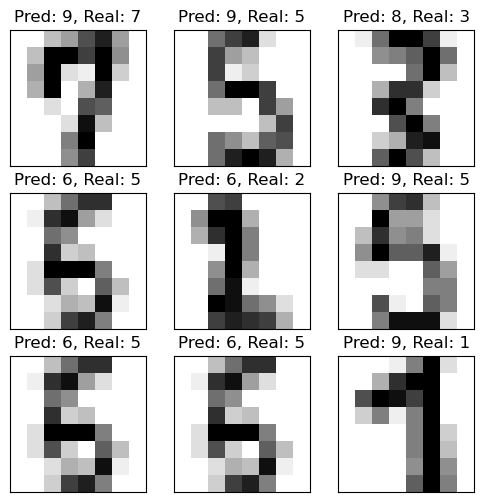

In [529]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(misclassified_samples[random_indices[i]].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Pred: {predicted_class[misclassified_indices[random_indices[i]]]}, Real: {misclassified_labels[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### b) Exercises: Impact of the Optimizer

In this section, you will play around with the optimizer and see how it affects the performance of the model. We will start with the standard SGD optimizer, and then we will look at more advanced optimizers.

1. Try decreasing the learning rate of the SGD optimizer by a factor of 10, or 100. What do you observe?
2. Try increasing the learning rate of the SGD optimizer. What happens?
3. The SGD optimizer has a momentum parameter. In a nutshell, this parameter controls how much the gradient from the previous step affects the current step. Try enabling momentum in the SGD optimizer with a value of 0.9. What happens?
  
**Notes**:

The keras API documentation is available at:

https://www.tensorflow.org/api_docs/python/tf/keras

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

It is also possible to type the beginning of a function call / constructor and type "shift-tab" after the opening paren:

```python
optimizers.SGD(<shift-tab>
```

## Decrease Learning rate by 10% to 0.001

In [530]:
model1 = Sequential()
model1.add(Dense(64,activation='relu',input_shape=(64,)))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 64)                4160      
                                                                 
 dense_189 (Dense)           (None, 64)                4160      
                                                                 
 dense_190 (Dense)           (None, 10)                650       
                                                                 
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [531]:
learning_rate1=0.001
# learning_rate 0.01 is default, so decreasing by 10%
model1.compile(optimizer=SGD(learning_rate=learning_rate1),loss='categorical_crossentropy',metrics=['accuracy'])

In [532]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 0s 6ms/step - loss: 0.0742 - accuracy: 0.9843 - val_loss: 0.1958 - val_accuracy: 0.9410
Epoch 2/10
36/36 [==============================] - 0s 6ms/step - loss: 0.0669 - accuracy: 0.9878 - val_loss: 0.1833 - val_accuracy: 0.9410
Epoch 3/10
36/36 [==============================] - 0s 5ms/step - loss: 0.0611 - accuracy: 0.9869 - val_loss: 0.1817 - val_accuracy: 0.9410
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9939 - val_loss: 0.1786 - val_accuracy: 0.9444
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9887 - val_loss: 0.1845 - val_accuracy: 0.9479
Epoch 6/10
36/36 [==============================] - 0s 5ms/step - loss: 0.0492 - accuracy: 0.9930 - val_loss: 0.1699 - val_accuracy: 0.9444
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9948 - val_loss: 0.1759 - val_accuracy: 0.9444
Epoch 8/10
36/36 [==

In [533]:
loss1,accuracy1, = model.evaluate(X_test,y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9694


In [534]:
print(f'Accuracy is {(accuracy1*100):.2f}%')
print(f'Loss is {loss1:.2f}')

Accuracy is 96.94%
Loss is 0.09


In [535]:
# First create/save the file locally
with open("my_model_summary.txt", "w") as f:
    f.write("Model summary here")

In [536]:
artifact_location = "s3://deeplearninglab/"
with mlflow.start_run(run_name="Model"):
    # Log parameters
    mlflow.log_param("optimizer", "SGD")
    mlflow.log_param("epochs", 10)


    # Log metrics
    accuracy = history.history['accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)
    
    mlflow.log_param("param1", 5)
    # This tells MLflow where to store artifacts
    
    mlflow.log_artifact("my_model_summary.txt", artifact_path="model")
    # Log model
    mlflow.keras.log_model(model, "model")


2025/07/06 17:43:34 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\nages\AppData\Local\Temp\tmp4vkzhuh4\model\data\model\assets


2025/07/06 17:43:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Model at: http://localhost:5000/#/experiments/1/runs/97ccac5545414874a5cf912432407a7e
🧪 View experiment at: http://localhost:5000/#/experiments/1


## Accuracy has gone by 2% when learning rate is reduce by 10%

# Decrease Learning rate by 100% to 0.001

In [537]:
model2 = Sequential()
model2.add(Dense(64,activation='relu',input_shape=(64,)))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_191 (Dense)           (None, 64)                4160      
                                                                 
 dense_192 (Dense)           (None, 64)                4160      
                                                                 
 dense_193 (Dense)           (None, 10)                650       
                                                                 
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [538]:
learning_rate2 = 0.0001
# learning_rate 0.01 is default, so decreasing by 100%
model2.compile(optimizer=SGD(learning_rate=learning_rate2),loss='categorical_crossentropy',metrics=['accuracy'])

In [539]:
history2 = model2.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 1s 10ms/step - loss: 5.2699 - accuracy: 0.0983 - val_loss: 4.4354 - val_accuracy: 0.1458
Epoch 2/10
36/36 [==============================] - 0s 5ms/step - loss: 4.1305 - accuracy: 0.1384 - val_loss: 3.7820 - val_accuracy: 0.1667
Epoch 3/10
36/36 [==============================] - 0s 5ms/step - loss: 3.5995 - accuracy: 0.1593 - val_loss: 3.3858 - val_accuracy: 0.1667
Epoch 4/10
36/36 [==============================] - 0s 5ms/step - loss: 3.2404 - accuracy: 0.1723 - val_loss: 3.0901 - val_accuracy: 0.1736
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 2.9680 - accuracy: 0.1976 - val_loss: 2.8578 - val_accuracy: 0.2014
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 2.7466 - accuracy: 0.2185 - val_loss: 2.6607 - val_accuracy: 0.2396
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 2.5610 - accuracy: 0.2472 - val_loss: 2.4924 - val_accuracy: 0.2743
Epoch 8/10
36/36 [=

In [540]:
artifact_location = "s3://deeplearninglab/"
with mlflow.start_run(run_name="Model2 with Learning rate=0.0001"):
    # Log parameters
    mlflow.log_param("optimizer", "SGD")
    mlflow.log_param("epochs", 10)


    # Log metrics
    accuracy = history2.history['accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)
    
    mlflow.log_param("param1", 5)
    # This tells MLflow where to store artifacts
    mlflow.log_artifact("my_model_summary.txt", artifact_path="model")
    # Log model
    mlflow.keras.log_model(model2, "Model2 with Learning rate=0.0001")


2025/07/06 17:44:02 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\nages\AppData\Local\Temp\tmp6vfx4u8w\model\data\model\assets


2025/07/06 17:44:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Model2 with Learning rate=0.0001 at: http://localhost:5000/#/experiments/1/runs/2a84df47055147af86e87b0869adb0a6
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [541]:
loss2,accuracy2 = model2.evaluate(X_test,y_test)

12/12 [==============================] - 0s 3ms/step - loss: 2.1743 - accuracy: 0.3167


In [542]:
print(f'Accuracy is {(accuracy2*100):.2f}%')
print(f'Loss is {loss2:.2f}')

Accuracy is 31.67%
Loss is 2.17


In [543]:
print(f'Accuracy for {default_learning_rate} is {(accuracy*100):.2f}%')
print(f'Accuracy for {learning_rate1} is {(accuracy1*100):.2f}')
print(f'Accuracy for {learning_rate2} is {(accuracy2*100):.2f}')

Accuracy for 0.01 is 33.25%
Accuracy for 0.001 is 96.94
Accuracy for 0.0001 is 31.67


## Accuracy has gone UP significantly when learning rate is reduce by 10%
## Accuracy has gone Down significantly when learning rate is reduce by 100%
# SO learning rate seems to be around 0.001 and has not much bearing afterwards. May be we can try reducing some more learning rate say by 20% and see how it does

############################################

# Increase Learning rate to 0.05

In [544]:
model3 = Sequential()
model3.add(Dense(64,activation='relu',input_shape=(64,)))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(10,activation='softmax'))
model3.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 64)                4160      
                                                                 
 dense_195 (Dense)           (None, 64)                4160      
                                                                 
 dense_196 (Dense)           (None, 10)                650       
                                                                 
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [545]:
learning_rate3 = 0.05
# learning_rate 0.01 is default, so increasing by 10%
model3.compile(optimizer=SGD(learning_rate=learning_rate3),loss='categorical_crossentropy',metrics=['accuracy'])

In [546]:
history3 = model3.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 1s 11ms/step - loss: 3.5852 - accuracy: 0.3951 - val_loss: 0.9937 - val_accuracy: 0.6771
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 0.6068 - accuracy: 0.8164 - val_loss: 0.3604 - val_accuracy: 0.8854
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.2507 - accuracy: 0.9286 - val_loss: 0.2934 - val_accuracy: 0.9028
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.9321 - val_loss: 0.2298 - val_accuracy: 0.9062
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1245 - accuracy: 0.9652 - val_loss: 0.2581 - val_accuracy: 0.9201
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9626 - val_loss: 0.1748 - val_accuracy: 0.9410
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0748 - accuracy: 0.9774 - val_loss: 0.1761 - val_accuracy: 0.9375
Epoch 8/10
36/36 [=

In [547]:
artifact_location = "s3://deeplearninglab/"
with mlflow.start_run(run_name="Model3 with Learning rate=0.05"):
    # Log parameters
    mlflow.log_param("optimizer", "SGD")
    mlflow.log_param("epochs", 10)


    # Log metrics
    accuracy = history3.history['accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)
    
    mlflow.log_param("learning_rate", 0.05)
    # This tells MLflow where to store artifacts
    mlflow.log_artifact("my_model_summary.txt", artifact_path="model")
    # Log model
    mlflow.keras.log_model(model3, "Model3 with Learning rate=0.05")


2025/07/06 17:44:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\nages\AppData\Local\Temp\tmpp8bgdgbf\model\data\model\assets


2025/07/06 17:44:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Model3 with Learning rate=0.05 at: http://localhost:5000/#/experiments/1/runs/374eb163dfc74efb8446578360acf52f
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [548]:
loss3,accuracy3 = model3.evaluate(X_test,y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9528


In [549]:
print(f'Accuracy is {(accuracy3*100):.2f}%')
print(f'Loss is {loss3:.2f}')

Accuracy is 95.28%
Loss is 0.17


## I tried to increase learning rate to 0.1 and 0.05 but accuracy is going down significantly to single digit. so Learning rate around 0.001 seems to be better accuracy

## Chaning the Momentum parameter
## default momentum is 0.0 so changint to 0.5

In [550]:
model4 = Sequential()
model4.add(Dense(64,activation='relu',input_shape=(64,)))
model4.add(Dense(64,activation='relu'))
model4.add(Dense(10,activation='softmax'))
model4.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_197 (Dense)           (None, 64)                4160      
                                                                 
 dense_198 (Dense)           (None, 64)                4160      
                                                                 
 dense_199 (Dense)           (None, 10)                650       
                                                                 
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [551]:
learning_rate4 = 0.01
momentum4 = 0.01
# learning_rate 0.01 is default, so increasing by 10%
model4.compile(optimizer=SGD(learning_rate=learning_rate4,momentum=momentum4),loss='categorical_crossentropy',metrics=['accuracy'])

## Momentum helps in Non-convex Loss function to alleviate oscillaiton in valleys

In [552]:
history4 = model4.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)


Epoch 1/10
36/36 [==============================] - 1s 12ms/step - loss: 1.4609 - accuracy: 0.6092 - val_loss: 0.6902 - val_accuracy: 0.7708
Epoch 2/10
36/36 [==============================] - 0s 5ms/step - loss: 0.4523 - accuracy: 0.8538 - val_loss: 0.4758 - val_accuracy: 0.8611
Epoch 3/10
36/36 [==============================] - 0s 5ms/step - loss: 0.2834 - accuracy: 0.9060 - val_loss: 0.3700 - val_accuracy: 0.9028
Epoch 4/10
36/36 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.9356 - val_loss: 0.3286 - val_accuracy: 0.9028
Epoch 5/10
36/36 [==============================] - 0s 6ms/step - loss: 0.1719 - accuracy: 0.9521 - val_loss: 0.2810 - val_accuracy: 0.9167
Epoch 6/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1403 - accuracy: 0.9661 - val_loss: 0.2635 - val_accuracy: 0.9306
Epoch 7/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1175 - accuracy: 0.9756 - val_loss: 0.2553 - val_accuracy: 0.9306
Epoch 8/10
36/36 [=

In [553]:
artifact_location = "s3://deeplearninglab/"
with mlflow.start_run(run_name="Model2 with Learning rate=0.01 and Momentum=0.01"):
    # Log parameters
    mlflow.log_param("optimizer", "SGD")
    mlflow.log_param("epochs", 10)
    mlflow.log_param('learning_rate',0.01)
    mlflow.log_param('momentum4',0.01)

    # Log metrics
    accuracy = history4.history['accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)
    
    # This tells MLflow where to store artifacts
    mlflow.log_artifact("my_model_summary.txt", artifact_path="model")
    # Log model
    mlflow.keras.log_model(model4, "Model2 with Learning rate=0.05")


2025/07/06 17:44:35 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\nages\AppData\Local\Temp\tmp08ewbth_\model\data\model\assets


2025/07/06 17:44:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Model2 with Learning rate=0.01 and Momentum=0.01 at: http://localhost:5000/#/experiments/1/runs/001eb8861a0947afa4ff72f5f7c2e9fd
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [554]:
loss4,accuracy4 = model4.evaluate(X_test,y_test)


12/12 [==============================] - 0s 5ms/step - loss: 0.1331 - accuracy: 0.9611


In [555]:
print(f'Accuracy is {(accuracy4*100):.2f}%')
print(f'Loss is {loss4:.2f}')

Accuracy is 96.11%
Loss is 0.13


In [556]:
print(f'Accuracy for {default_learning_rate} is {(accuracy*100):.2f}%')
print(f'Accuracy for {learning_rate1} is {(accuracy1*100):.2f}')
print(f'Accuracy for {learning_rate2} is {(accuracy2*100):.2f}')
print(f'Accuracy for {learning_rate3} is {(accuracy3*100):.2f}')
print(f'Accuracy for {learning_rate4} and Momentum {momentum4} is {(accuracy4*100):.2f}')

Accuracy for 0.01 is 98.35%
Accuracy for 0.001 is 96.94
Accuracy for 0.0001 is 31.67
Accuracy for 0.05 is 95.28
Accuracy for 0.01 and Momentum 0.01 is 96.11


# Accuracy is stabilized and Loss function converged around learning_rate of 0.001 and momentum around 0.01 with around 96% accuracy which is NOT bad for digit classification

# Change Optimizer to popular one Adam

In [557]:
model5 = Sequential()
model5.add(Dense(64,activation='relu',input_shape=(64,)))
model5.add(Dense(64,activation='relu'))
model5.add(Dense(10,activation='softmax'))
model5.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 64)                4160      
                                                                 
 dense_201 (Dense)           (None, 64)                4160      
                                                                 
 dense_202 (Dense)           (None, 10)                650       
                                                                 
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [558]:
learning_rate5 = 0.01
# learning_rate 0.01 is default, so increasing by 10%
model5.compile(optimizer=Adam(learning_rate=learning_rate4),loss='categorical_crossentropy',metrics=['accuracy'])

In [559]:
history5=model5.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)


Epoch 1/10
36/36 [==============================] - 1s 12ms/step - loss: 1.3585 - accuracy: 0.6797 - val_loss: 0.2933 - val_accuracy: 0.9167
Epoch 2/10
36/36 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.9269 - val_loss: 0.2395 - val_accuracy: 0.9306
Epoch 3/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1359 - accuracy: 0.9574 - val_loss: 0.2148 - val_accuracy: 0.9410
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9748 - val_loss: 0.1487 - val_accuracy: 0.9549
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0493 - accuracy: 0.9826 - val_loss: 0.1478 - val_accuracy: 0.9444
Epoch 6/10
36/36 [==============================] - 0s 5ms/step - loss: 0.0463 - accuracy: 0.9826 - val_loss: 0.2389 - val_accuracy: 0.9167
Epoch 7/10
36/36 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9687 - val_loss: 0.2307 - val_accuracy: 0.9340
Epoch 8/10
36/36 [=

In [560]:
artifact_location = "s3://deeplearninglab/"
with mlflow.start_run(run_name="Model2 with Adam and learning_rate=0.01 "):
    # Log parameters
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("epochs", 10)
    mlflow.log_param('learning_rate',0.01)

    # Log metrics
    accuracy = history5.history['accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)
    
    # This tells MLflow where to store artifacts
    mlflow.log_artifact("my_model_summary.txt", artifact_path="model")
    # Log model
    mlflow.keras.log_model(model5, "Model2 with Learning rate=0.05")


2025/07/06 17:44:51 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\nages\AppData\Local\Temp\tmpjxqxgtsr\model\data\model\assets


2025/07/06 17:45:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Model2 with Adam and learning_rate=0.01  at: http://localhost:5000/#/experiments/1/runs/e5938a71fe354458b1437520df765758
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [561]:
loss5,accuracy5 = model5.evaluate(X_test,y_test)


12/12 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9389


In [562]:
print(f'Accuracy is {(accuracy5*100):.2f}%')
print(f'Loss is {loss5:.2f}')

Accuracy is 93.89%
Loss is 0.21


In [563]:
print(f'Accuracy for {default_learning_rate} is {(accuracy*100):.2f}%')
print(f'Accuracy for {learning_rate1} is {(accuracy1*100):.2f}')
print(f'Accuracy for {learning_rate2} is {(accuracy2*100):.2f}')
print(f'Accuracy for {learning_rate3} is {(accuracy3*100):.2f}')
print(f'Accuracy for {learning_rate4} and Momentum {momentum4} is {(accuracy4*100):.2f}')
print(f'Accuracy for {learning_rate5} and Optimizer Adam is {(accuracy5*100):.2f}')

Accuracy for 0.01 is 96.95%
Accuracy for 0.001 is 96.94
Accuracy for 0.0001 is 31.67
Accuracy for 0.05 is 95.28
Accuracy for 0.01 and Momentum 0.01 is 96.11
Accuracy for 0.01 and Optimizer Adam is 93.89


## Accuracy is stabilized around 97% with Adam optimizer and learning_rate =0.001

## Add Extra Hidden Layer

In [564]:
model6 = Sequential()
model6.add(Dense(64,activation='relu',input_shape=(64,)))
model6.add(Dense(64,activation='relu'))
model6.add(Dense(64,activation='relu'))
model6.add(Dense(10,activation='softmax'))
model6.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_203 (Dense)           (None, 64)                4160      
                                                                 
 dense_204 (Dense)           (None, 64)                4160      
                                                                 
 dense_205 (Dense)           (None, 64)                4160      
                                                                 
 dense_206 (Dense)           (None, 10)                650       
                                                                 
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


In [565]:
learning_rate6 = 0.01
# learning_rate 0.01 is default, so increasing by 10%
model6.compile(optimizer=Adam(learning_rate=learning_rate4),loss='categorical_crossentropy',metrics=['accuracy'])

In [566]:
history6 =model6.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)


Epoch 1/10
36/36 [==============================] - 1s 13ms/step - loss: 1.2391 - accuracy: 0.6197 - val_loss: 0.8368 - val_accuracy: 0.7222
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8721 - val_loss: 0.2731 - val_accuracy: 0.9062
Epoch 3/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1566 - accuracy: 0.9513 - val_loss: 0.2214 - val_accuracy: 0.9236
Epoch 4/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1142 - accuracy: 0.9652 - val_loss: 0.2993 - val_accuracy: 0.8958
Epoch 5/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1254 - accuracy: 0.9574 - val_loss: 0.3888 - val_accuracy: 0.9236
Epoch 6/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.9521 - val_loss: 0.2032 - val_accuracy: 0.9236
Epoch 7/10
36/36 [==============================] - 0s 5ms/step - loss: 0.1201 - accuracy: 0.9591 - val_loss: 0.2978 - val_accuracy: 0.9340
Epoch 8/10
36/36 [=

In [567]:
artifact_location = "s3://deeplearninglab/"
with mlflow.start_run(run_name="Model6 with Adam Optimizer and default Learning rate=0.01"):
    # Log parameters
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("epochs", 10)
    mlflow.log_param('learning_rate',0.01)

    # Log metrics
    accuracy = history6.history['accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)
    
    # This tells MLflow where to store artifacts
    mlflow.log_artifact("my_model_summary.txt", artifact_path="model")
    # Log model
    mlflow.keras.log_model(model6, "Model6 with Adam Optimizer and default Learning rate=0.01")


2025/07/06 17:45:07 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\nages\AppData\Local\Temp\tmprxtpsn7d\model\data\model\assets


2025/07/06 17:45:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Model6 with Adam Optimizer and default Learning rate=0.01 at: http://localhost:5000/#/experiments/1/runs/2d04aba895e54ed9bd6d4b74c156b6a7
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [568]:
loss6,accuracy6 = model6.evaluate(X_test,y_test)


12/12 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.9472


In [569]:
print(f'Accuracy is {(accuracy6*100):.2f}%')
print(f'Loss is {loss6:.2f}')

Accuracy is 94.72%
Loss is 0.26


In [570]:
print(f'Accuracy for {default_learning_rate} is {(accuracy*100):.2f}%')
print(f'Accuracy for {learning_rate1} is {(accuracy1*100):.2f}')
print(f'Accuracy for {learning_rate2} is {(accuracy2*100):.2f}')
print(f'Accuracy for {learning_rate3} is {(accuracy3*100):.2f}')
print(f'Accuracy for {learning_rate4} and Momentum {momentum4} is {(accuracy4*100):.2f}')
print(f'Accuracy for {learning_rate5} and Optimizer Adam is {(accuracy5*100):.2f}')
print(f'Accuracy for {learning_rate6} and Optimizer Adam , Extra Hidden layer is {(accuracy6*100):.2f}')

Accuracy for 0.01 is 97.56%
Accuracy for 0.001 is 96.94
Accuracy for 0.0001 is 31.67
Accuracy for 0.05 is 95.28
Accuracy for 0.01 and Momentum 0.01 is 96.11
Accuracy for 0.01 and Optimizer Adam is 93.89
Accuracy for 0.01 and Optimizer Adam , Extra Hidden layer is 94.72


## adding extra layer didnt do much to accuracy

### Exercises: Forward Pass and Generalization

Let's look in more detail at how the model makes predictions on the test set. We will walk through each step of making predictions, examining exactly what's going on.

To start, we will apply our model to the test set, and look at what we get as output:

In [571]:
predictions_tf = model(X_test)
predictions_tf[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[6.7775778e-05, 4.9127807e-04, 1.9516594e-05, 5.5434742e-07,
        4.4880140e-05, 6.5313296e-05, 9.9801016e-01, 3.6529284e-05,
        1.2215216e-03, 4.2464195e-05],
       [9.6100130e-06, 1.2597036e-06, 2.9852993e-06, 4.9596216e-04,
        7.3481722e-05, 1.9410687e-02, 1.3797947e-07, 7.4849063e-06,
        9.0995534e-05, 9.7990727e-01],
       [8.5124803e-11, 3.4992604e-07, 1.4853339e-06, 9.9994308e-01,
        5.5574687e-09, 4.4510965e-05, 6.9686203e-09, 2.1612271e-07,
        7.3042743e-06, 3.0003796e-06],
       [1.9586422e-03, 8.0569349e-05, 2.9779648e-04, 1.9906905e-04,
        1.7829175e-04, 1.1195329e-02, 1.1524172e-05, 9.5445180e-01,
        9.2359964e-04, 3.0703407e-02],
       [2.3230066e-05, 3.2509220e-04, 9.7194517e-01, 2.7283764e-02,
        1.7560762e-07, 2.5293347e-04, 4.0576288e-05, 1.9582862e-05,
        8.4632222e-05, 2.4864488e-05]], dtype=float32)>

In [572]:
type(predictions_tf), predictions_tf.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([360, 10]))

In [573]:
tf.reduce_sum(predictions_tf, axis=1)[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.99999994, 0.9999999 , 1.        , 1.        , 1.0000001 ],
      dtype=float32)>

In [574]:
predicted_labels_tf = tf.argmax(predictions_tf, axis=1)
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([6, 9, 3, 7, 2], dtype=int64)>

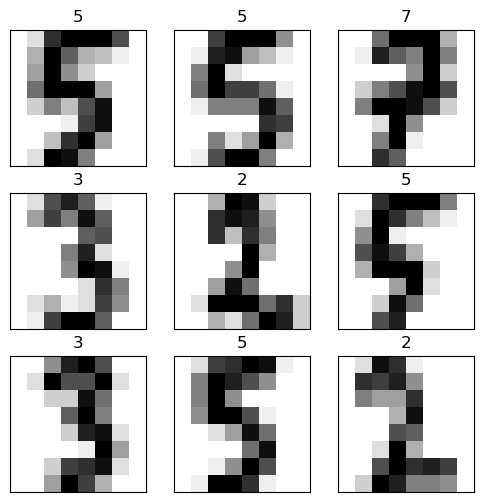

In [575]:
# Get the values corresponding to the predicted labels for each sample
predicted_values_tf = tf.reduce_max(predictions_tf, axis=1)

# Get the indices of the samples with the highest predicted values
most_confident_indices_tf = tf.argsort(predicted_values_tf, direction='DESCENDING').numpy()[:9]

# Get the 9 most confident samples
most_confident_samples_tf = X_test[most_confident_indices_tf]

# Get the true labels for the 9 most confident samples
most_confident_labels_tf = np.argmax(y_test[most_confident_indices_tf], axis=1)

# Plot the 9 most confident samples
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(most_confident_samples_tf[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"{most_confident_labels_tf[i]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [576]:


normal_init = initializers.TruncatedNormal(stddev=0.01, seed=42)

model7 = Sequential()
model7.add(Dense(64, input_dim=64, activation="relu",
                kernel_initializer=normal_init))
model7.add(Dense(64, activation="relu",
                kernel_initializer=normal_init))
model7.add(Dense(10, activation="softmax",
                kernel_initializer=normal_init))

model7.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [577]:
model7.layers


In [578]:
model7.layers[0].weights

[<tf.Variable 'dense_207/kernel:0' shape=(64, 64) dtype=float32, numpy=
 array([[ 0.00015817, -0.01590087,  0.00103594, ...,  0.00962818,
          0.00624957,  0.00994726],
        [ 0.0081879 ,  0.00756818, -0.00668142, ...,  0.01084459,
         -0.00317478, -0.00549116],
        [-0.00086618, -0.00287623,  0.00391693, ...,  0.00064558,
         -0.00420471,  0.00174566],
        ...,
        [-0.0029006 , -0.0091218 ,  0.00804327, ..., -0.01407086,
          0.00952832, -0.01348555],
        [ 0.00375078,  0.00967842,  0.00098119, ..., -0.00413454,
          0.01695471,  0.00025196],
        [ 0.00459809,  0.01223094, -0.00213172, ...,  0.01246831,
         -0.00714749, -0.00868595]], dtype=float32)>,
 <tf.Variable 'dense_207/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [579]:
weights = model7.layers[0].weights[0].numpy()

In [580]:
weights.std()

0.008835949

In [581]:
 bias = model7.layers[0].weights[1].numpy()
 print('Bia is ',bias)

Bia is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [582]:
history7 = model7.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
45/45 [==============================] - 0s 2ms/step - loss: 2.3025 - accuracy: 0.1016
Epoch 2/15
45/45 [==============================] - 0s 2ms/step - loss: 2.3020 - accuracy: 0.1830
Epoch 3/15
45/45 [==============================] - 0s 3ms/step - loss: 2.3014 - accuracy: 0.1872
Epoch 4/15
45/45 [==============================] - 0s 3ms/step - loss: 2.3008 - accuracy: 0.1802
Epoch 5/15
45/45 [==============================] - 0s 2ms/step - loss: 2.2998 - accuracy: 0.1893
Epoch 6/15
45/45 [==============================] - 0s 3ms/step - loss: 2.2986 - accuracy: 0.2331
Epoch 7/15
45/45 [==============================] - 0s 2ms/step - loss: 2.2969 - accuracy: 0.2359
Epoch 8/15
45/45 [==============================] - 0s 2ms/step - loss: 2.2943 - accuracy: 0.1969
Epoch 9/15
45/45 [==============================] - 0s 2ms/step - loss: 2.2898 - accuracy: 0.2651
Epoch 10/15
45/45 [==============================] - 0s 2ms/step - loss: 2.2820 - accuracy: 0.2742
Epoch 11/15
45/45 [

In [583]:
artifact_location = "s3://deeplearninglab/"
with mlflow.start_run(run_name="Model7 with SGD Optimizer,default Learning rate=0.01 and Standard Deviation 0.01"):
    # Log parameters
    mlflow.log_param("optimizer", "SGD")
    mlflow.log_param("epochs", 10)
    mlflow.log_param('learning_rate',0.01)
    mlflow.log_param('std',0.01)

    # Log metrics
    accuracy = history7.history['accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)
    
    # This tells MLflow where to store artifacts
    mlflow.log_artifact("my_model_summary.txt", artifact_path="model")
    # Log model
    mlflow.keras.log_model(model6, "Model7 with SGD Optimizer,default Learning rate=0.01 and Standard Deviation 0.01")


2025/07/06 17:45:24 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\nages\AppData\Local\Temp\tmpt8wepv8m\model\data\model\assets


2025/07/06 17:45:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Model7 with SGD Optimizer,default Learning rate=0.01 and Standard Deviation 0.01 at: http://localhost:5000/#/experiments/1/runs/f3747d1980d54de0a9e880eea897bf65
🧪 View experiment at: http://localhost:5000/#/experiments/1


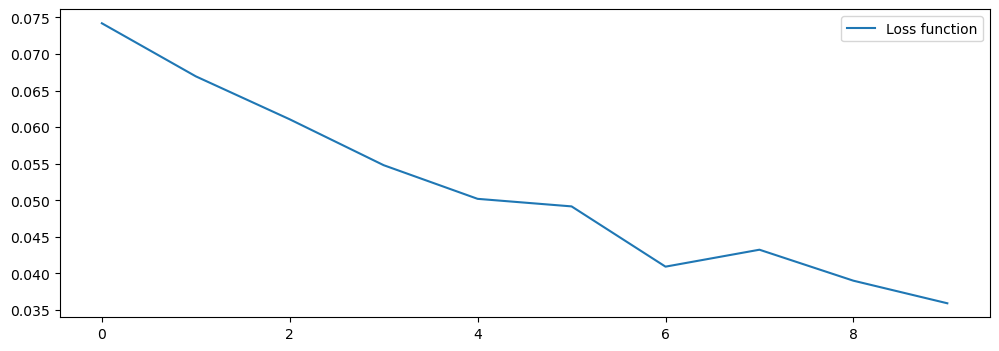

In [584]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Loss function")
plt.legend();

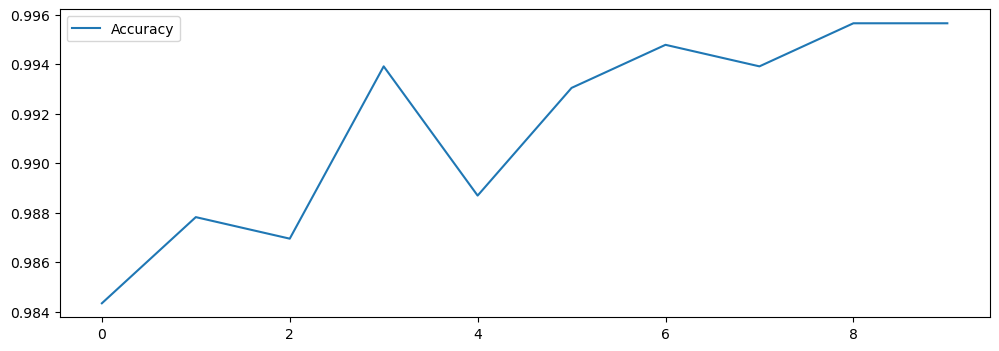

In [585]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label="Accuracy")
plt.legend();

In [586]:
model7.layers[0].weights

[<tf.Variable 'dense_207/kernel:0' shape=(64, 64) dtype=float32, numpy=
 array([[ 0.00015817, -0.01590087,  0.00103594, ...,  0.00962818,
          0.00624957,  0.00994726],
        [ 0.00899486,  0.00724704, -0.00595328, ...,  0.01084459,
         -0.00644444, -0.0062927 ],
        [ 0.00805804, -0.00501468,  0.01112279, ...,  0.00064558,
         -0.03654035, -0.0029778 ],
        ...,
        [ 0.00809179, -0.00684722,  0.02216224, ..., -0.01407086,
          0.02594993, -0.02215085],
        [ 0.01281862,  0.00996774,  0.01399725, ..., -0.00413454,
          0.01967356, -0.00832902],
        [ 0.00761463,  0.01297643,  0.00302663, ...,  0.01246831,
         -0.00661406, -0.01101151]], dtype=float32)>,
 <tf.Variable 'dense_207/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 5.7608850e-04,  3.2403442e-04,  7.5898314e-04,  1.0017903e-03,
         2.6002698e-04,  3.0101603e-04,  1.3222260e-03,  4.1336775e-06,
         1.2264440e-03,  1.7304157e-03,  3.4995461e-04,  9.5776649e-04,
  

#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `stddev=1e-3`
  - a larger scale e.g. `stddev=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are more advanced solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [587]:


normal_init = initializers.TruncatedNormal(stddev=0.001, seed=42)

model8 = Sequential()
model8.add(Dense(64, input_dim=64, activation="relu",
                kernel_initializer=normal_init))
model8.add(Dense(64, activation="relu",
                kernel_initializer=normal_init))
model8.add(Dense(10, activation="softmax",
                kernel_initializer=normal_init))

model8.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [588]:
history8 = model8.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
45/45 [==============================] - 1s 4ms/step - loss: 2.3036 - accuracy: 0.0856
Epoch 2/15
45/45 [==============================] - 0s 5ms/step - loss: 2.3032 - accuracy: 0.0981
Epoch 3/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.0967
Epoch 4/15
45/45 [==============================] - 0s 6ms/step - loss: 2.3031 - accuracy: 0.1072
Epoch 5/15
45/45 [==============================] - 0s 5ms/step - loss: 2.3033 - accuracy: 0.1072
Epoch 6/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1030
Epoch 7/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1072
Epoch 8/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3030 - accuracy: 0.1072
Epoch 9/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3033 - accuracy: 0.1058
Epoch 10/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.0995
Epoch 11/15
45/45 [

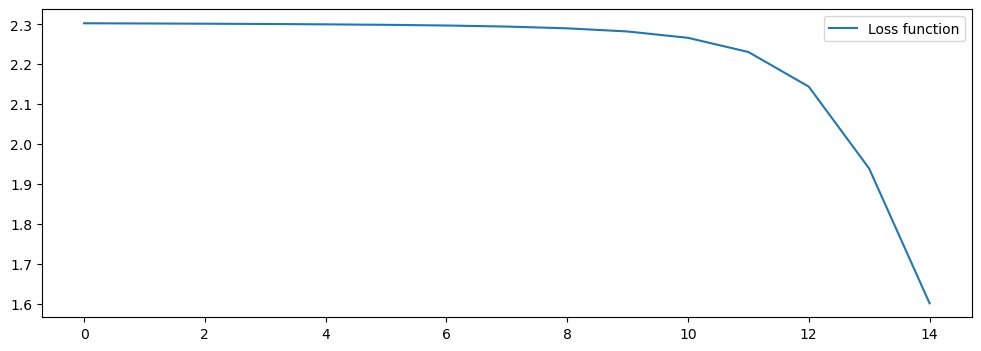

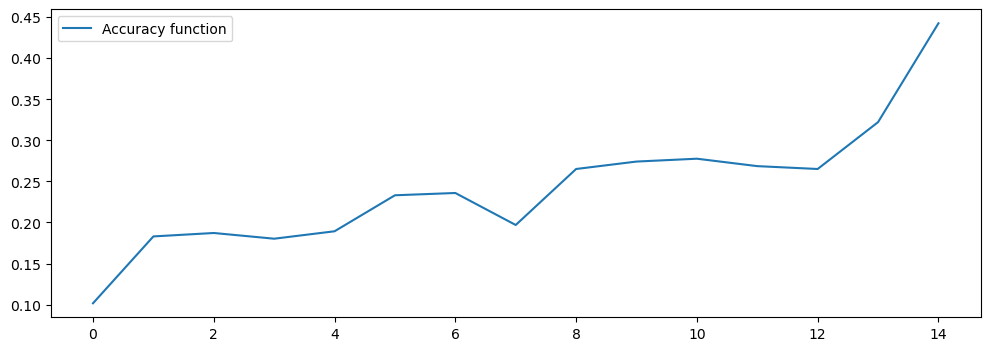

In [589]:
plt.figure(figsize=(12, 4))
plt.plot(history7.history['loss'], label="Loss function")
plt.legend();plt.figure(figsize=(12, 4))
plt.plot(history7.history['accuracy'], label="Accuracy function")
plt.legend();

In [590]:
# increase Std Deviation to 1

normal_init = initializers.TruncatedNormal(stddev=1, seed=42)

model9 = Sequential()
model9.add(Dense(64, input_dim=64, activation="relu",
                kernel_initializer=normal_init))
model9.add(Dense(64, activation="relu",
                kernel_initializer=normal_init))
model9.add(Dense(10, activation="softmax",
                kernel_initializer=normal_init))

model9.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [591]:
history9 = model9.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
45/45 [==============================] - 1s 4ms/step - loss: 1215040.8750 - accuracy: 0.0967
Epoch 2/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3046 - accuracy: 0.1023
Epoch 3/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3037 - accuracy: 0.1058
Epoch 4/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3034 - accuracy: 0.1072
Epoch 5/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.1072
Epoch 6/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3030 - accuracy: 0.0960
Epoch 7/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3029 - accuracy: 0.1072
Epoch 8/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3033 - accuracy: 0.1051
Epoch 9/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1072
Epoch 10/15
45/45 [==============================] - 0s 5ms/step - loss: 2.3031 - accuracy: 0.1051
Epoch 11/15
4

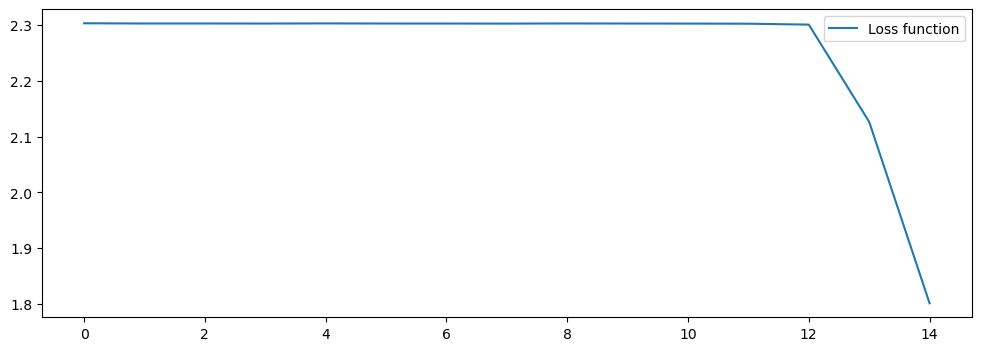

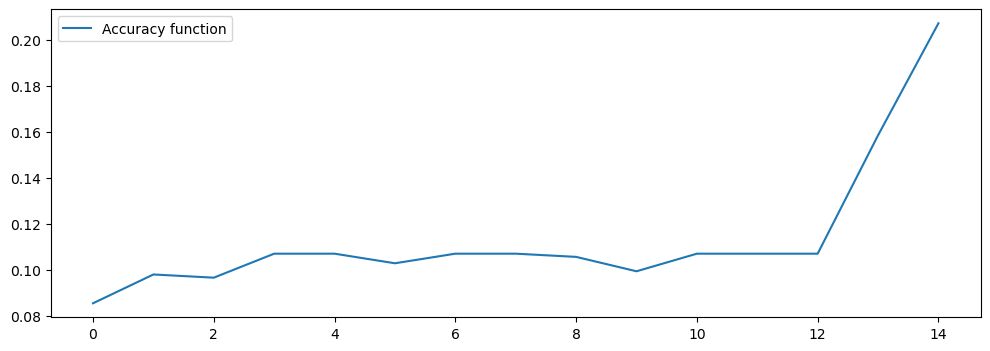

In [592]:
plt.figure(figsize=(12, 4))
plt.plot(history8.history['loss'], label="Loss function")
plt.legend();plt.figure(figsize=(12, 4))
plt.plot(history8.history['accuracy'], label="Accuracy function")
plt.legend();

In [593]:
# increase Std Deviation to 10

normal_init = initializers.TruncatedNormal(stddev=10, seed=42)

model10 = Sequential()
model10.add(Dense(64, input_dim=64, activation="relu",
                kernel_initializer=normal_init))
model10.add(Dense(64, activation="relu",
                kernel_initializer=normal_init))
model10.add(Dense(10, activation="softmax",
                kernel_initializer=normal_init))

model10.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [594]:
history10 = model10.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
45/45 [==============================] - 1s 4ms/step - loss: 12223008768.0000 - accuracy: 0.0856
Epoch 2/15
45/45 [==============================] - 0s 6ms/step - loss: 2.3049 - accuracy: 0.1009
Epoch 3/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3040 - accuracy: 0.1044
Epoch 4/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3034 - accuracy: 0.1072
Epoch 5/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3033 - accuracy: 0.1072
Epoch 6/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.1072
Epoch 7/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1072
Epoch 8/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.1072
Epoch 9/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1030
Epoch 10/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.1051
Epoch 11/

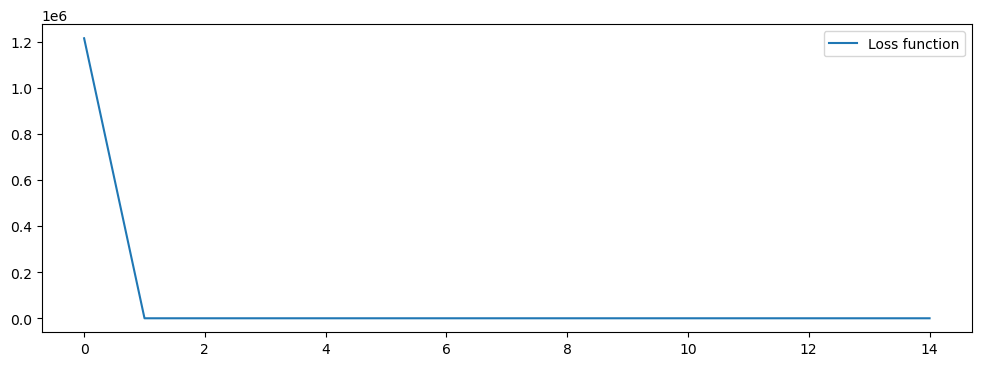

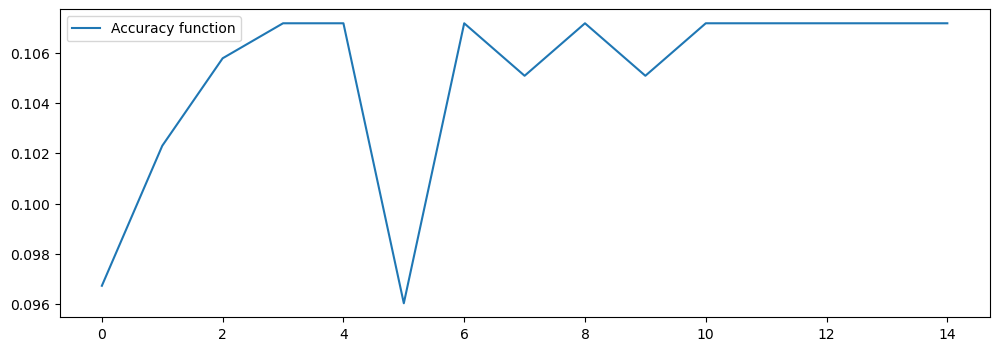

In [595]:
plt.figure(figsize=(12, 4))
plt.plot(history9.history['loss'], label="Loss function")
plt.legend();plt.figure(figsize=(12, 4))
plt.plot(history9.history['accuracy'], label="Accuracy function")
plt.legend();

## Increasing Std. Deviation to 1 or 10 fluctuates Accuracy in zig zag fashion before converges to high accuracy. so keeping Std. deviation at 0.001 seems to be better

In [596]:
# increase Std Deviation to 0

normal_init = initializers.TruncatedNormal(stddev=0, seed=42)

model11 = Sequential()
model11.add(Dense(64, input_dim=64, activation="relu",
                kernel_initializer=normal_init))
model11.add(Dense(64, activation="relu",
                kernel_initializer=normal_init))
model11.add(Dense(10, activation="softmax",
                kernel_initializer=normal_init))

model11.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [597]:
history11 = model11.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
45/45 [==============================] - 3s 4ms/step - loss: 2.3036 - accuracy: 0.0981
Epoch 2/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3034 - accuracy: 0.0946
Epoch 3/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3030 - accuracy: 0.1009
Epoch 4/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1051
Epoch 5/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3030 - accuracy: 0.1072
Epoch 6/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1016
Epoch 7/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1016
Epoch 8/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3033 - accuracy: 0.1072
Epoch 9/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3030 - accuracy: 0.1072
Epoch 10/15
45/45 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.1072
Epoch 11/15
45/45 [

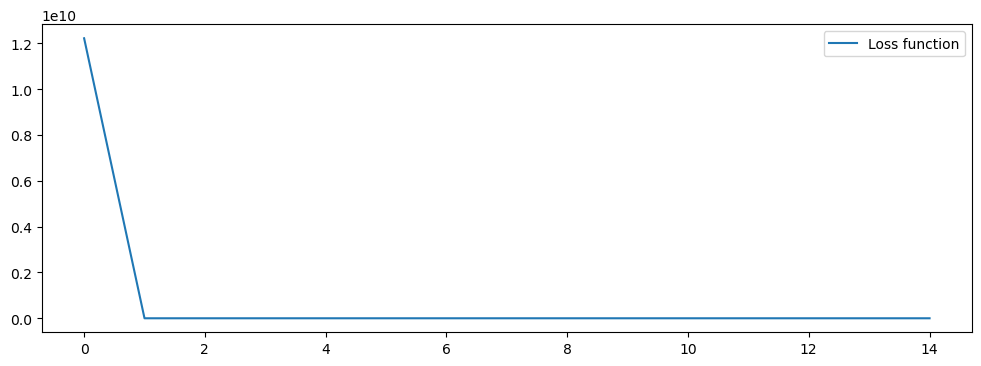

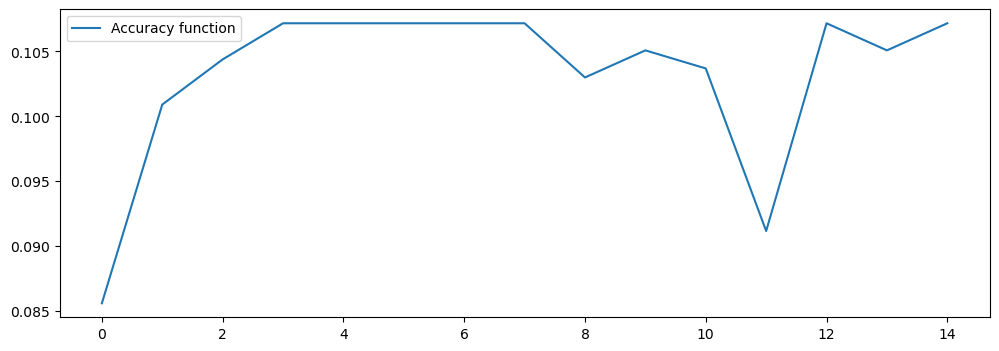

In [598]:
plt.figure(figsize=(12, 4))
plt.plot(history10.history['loss'], label="Loss function")
plt.legend();plt.figure(figsize=(12, 4))
plt.plot(history10.history['accuracy'], label="Accuracy function")
plt.legend();

## Try the following initialization schemes and see whether
 the SGD algorithm can successfully train the network or
 not:
  
 a very small e.g. `stddev=1e-3`
  a larger scale e.g. `stddev=1` or `10`
  initialize all weights to 0 (constant initialization)
  
What do you observe? Can you find an explanation for those
 outcomes?

 Are more advanced solvers such as SGD with momentum or Adam able
 to deal better with such bad initializations?

#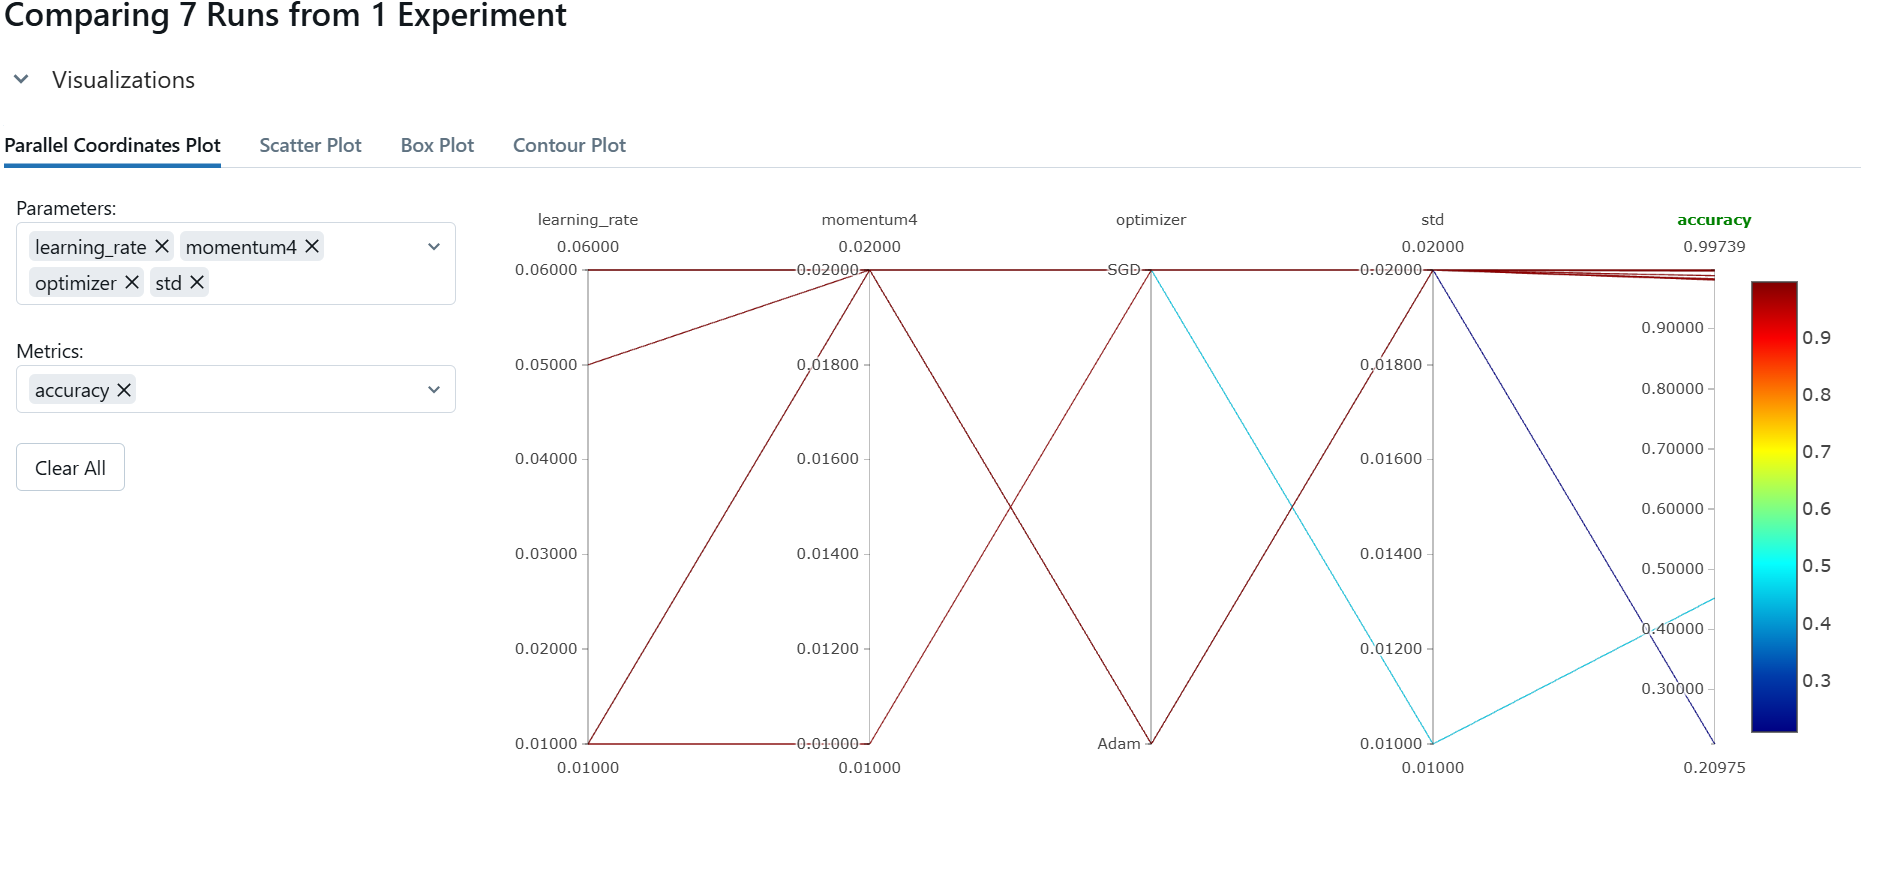
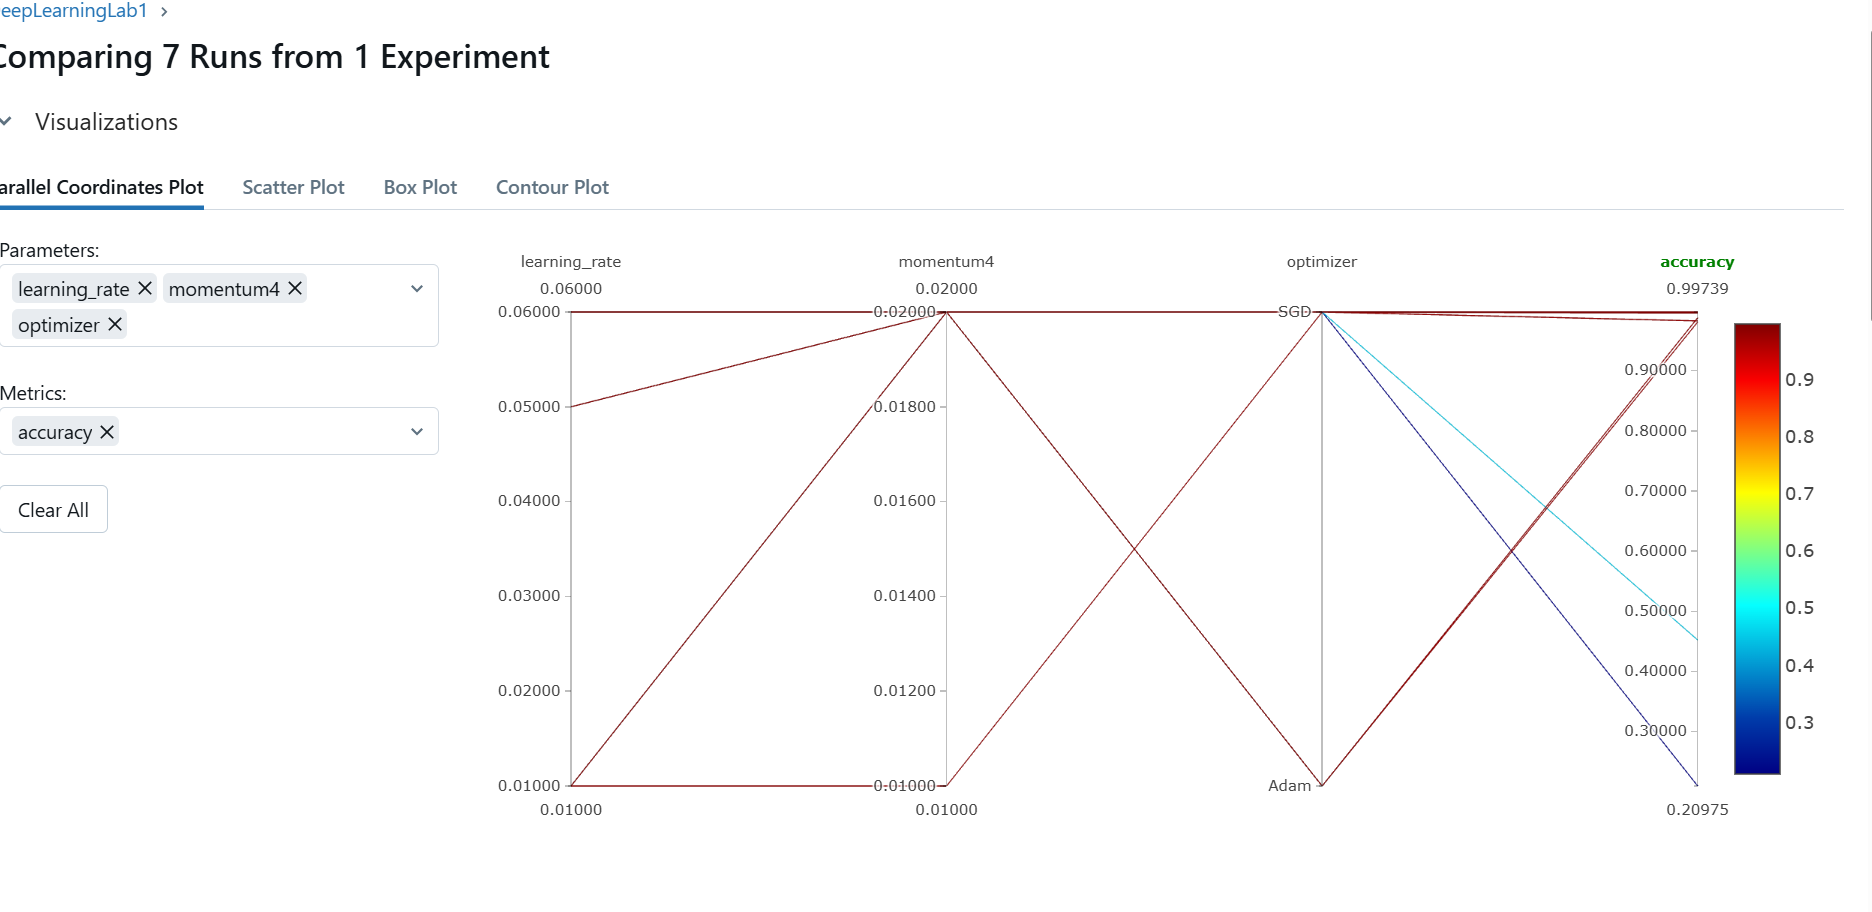

## Based on MLflow comparision of experiments model, model1.... model7 with optimizer SGD, Adam and variance in learning rate from default 0.01 to 0.5 and momentum=0.0 to 0.02 and higher std of 0.02. It is found that Highest accuracy of 0.99 in the case of SGD with learning rate=0.06 and momentum=0.02 and lowest accuracy of 0.209 with Adam optimizer with leanring rate of 0.01 and lower std of 0.01. Dark colors like Red,Brown is higher accuracy

# using MLflow experiments tracking, it's easier to compare the experiments and choose highest performing model and can be used RESTful endpoint to be invoked during inference time